<a href="https://colab.research.google.com/github/ShettyRyuga/DAV_Experiments/blob/main/DAV_Exp_4%2C5%2C6_58_Soham_Shetty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis using Python

Courtesy for Time Series Analysis using ARIMA Model :
* https://www.kaggle.com/code/ahmadjalalmasood123/time-series-analysis-using-arima-model
* https://www.youtube.com/watch?v=e8Yw4alG16Q
* https://www.kaggle.com/code/lejcruz/time-series-analysis-python
* https://www.youtube.com/playlist?list=PLqYFiz7NM_SMC4ZgXplbreXlRY4Jf4zBP

Courtesy for Dataset - [Air Passengers.csv (Kaggle)](https://www.kaggle.com/datasets/rakannimer/air-passengers?resource=download)

## Step - 1 : Importing Python Packages, Loading Data and Displaying the top 5 and last 5 rows

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
rcParams['figure.figsize']=10,6

In [2]:
dataset = pd. read_csv("/content/gold_price_data.csv")
dataset.describe()

,Value
count,10787.000000
mean,653.596634
std,434.030848
min,35.100000
25%,349.200000
50%,409.350000
75%,1061.625000
max,1895.000000


In [3]:
# Parse strings to datatime type
dataset['Date'] = pd.to_datetime(dataset['Date'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Date'])

In [4]:
indexedDataset.head(5)

,Value
Date,
1970-01-01,35.2
1970-04-01,35.1
1970-07-01,35.4
1970-10-01,36.2
1971-01-01,37.4


In [5]:
indexedDataset.tail(5)

,Value
Date,
2020-03-09,1672.50
2020-03-10,1655.70
2020-03-11,1653.75
2020-03-12,1570.70
2020-03-13,1562.80


## Step - 2 : Plotting the raw data

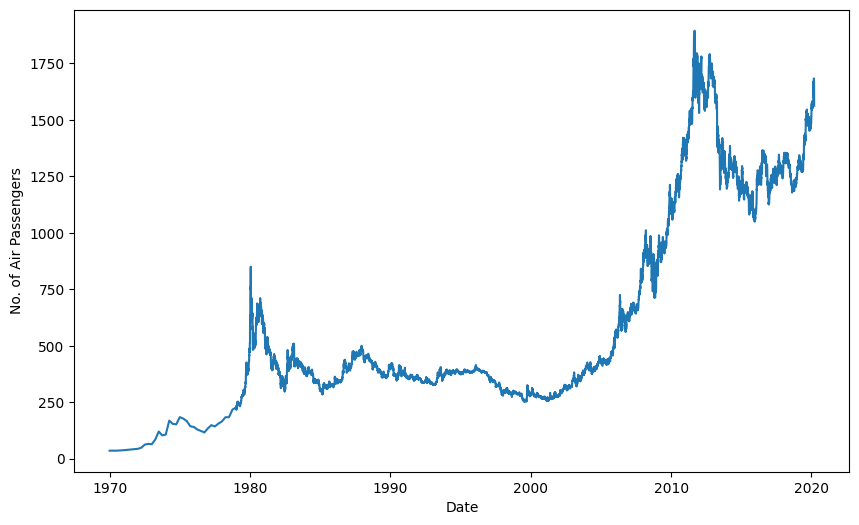

In [6]:
# Plot graph
plt.xlabel("Date")
plt.ylabel("No. of Air Passengers")
plt.plot(indexedDataset)

## Step - 3 : Check the stationarity of raw data

### a. Using Rolling Statistics

In [7]:
# Detecting Stationarity using Rolling Statistics
# As the mean is not constant, That
# rolling mean at yearly level
rollmean = indexedDataset.rolling(window=12).mean()
# rolling std at yearly level
rollstd = indexedDataset.rolling(window=12).std()
print(rollmean, rollstd)

                  Value
Date                   
1970-01-01          NaN
1970-04-01          NaN
1970-07-01          NaN
1970-10-01          NaN
1971-01-01          NaN
...                 ...
2020-03-09  1644.562500
2020-03-10  1645.595833
2020-03-11  1644.104167
2020-03-12  1637.470833
2020-03-13  1631.462500

[10787 rows x 1 columns]                 Value
Date                 
1970-01-01        NaN
1970-04-01        NaN
1970-07-01        NaN
1970-10-01        NaN
1971-01-01        NaN
...               ...
2020-03-09  26.155941
2020-03-10  26.345782
2020-03-11  25.219171
2020-03-12  32.777268
2020-03-13  39.258775

[10787 rows x 1 columns]


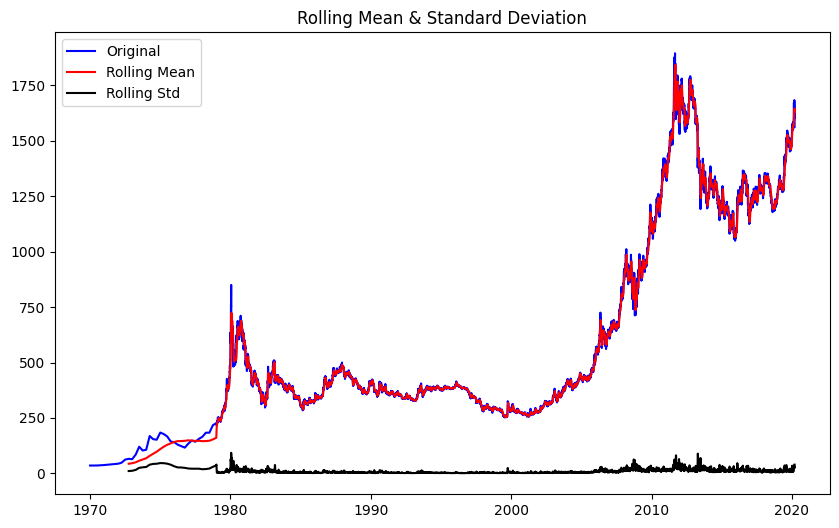

In [8]:
# Plot rolling statistics
orig = plt.plot(indexedDataset, color = 'blue', label = "Original")
mean = plt.plot(rollmean, color = 'red', label = "Rolling Mean")
std = plt.plot(rollstd, color = 'black', label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling Mean & Standard Deviation")
plt.show()

### b. Using Augmented Dicky-Fuller (ADF) Test

In [9]:
# Perform Dicky-Fuller Test
#import statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller
print("Results of Dickey Fuller Test")
# Here AIC helps to analyse the exact value from actual values and difference between them
dftest = adfuller(indexedDataset['Value'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','#Lags used','No. of observations used'])
for key, value in dftest[4].items():
  dfoutput['Critical value (%s)'%key]= value

print(dfoutput)

Results of Dickey Fuller Test
Test statistic                 -0.071121
p-value                         0.952240
#Lags used                     39.000000
No. of observations used    10747.000000
Critical value (1%)            -3.430959
Critical value (5%)            -2.861809
Critical value (10%)           -2.566913
dtype: float64


### c. test_stationarity()

 - Returns Plotting of Rolling Statistics
 - Test Statistics of Augmented Dicky-Fuller (ADF) test

In [10]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeSeries):
  # Determinig Rolling statistics
  movingaverage = timeSeries.rolling(window=12).mean()
  movingSTD = timeSeries.rolling(window=12).std()

  # Plot rolling statistics
  orig = plt.plot(timeSeries, color = 'blue', label = "Original")
  mean = plt.plot(movingaverage, color = 'red', label = "Rolling Mean")
  std = plt.plot(movingSTD, color = 'black', label = "Rolling Std")
  plt.legend(loc = "best")
  plt.title("Rolling Mean & Standard Deviation")
  plt.show()

  # Perform Dickey-Fuller Test
  print("Results of Dickey Fuller Test")
  dftest = adfuller(timeSeries['Value'], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','#Lags used','No. of observations used'])
  for key, value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]= value
  print(dfoutput)

## Step - 4 : Perform transformation to incorporate stationarity

#### Applying LogSCale to Raw Data

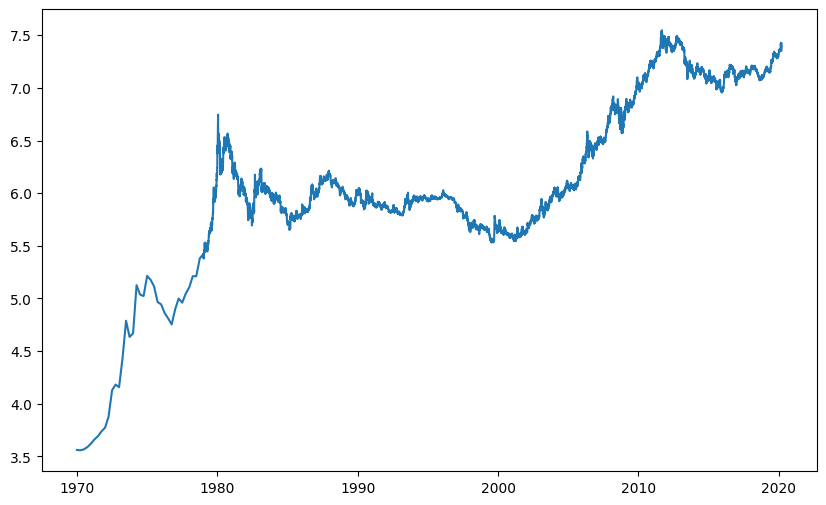

In [11]:
# Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

***Observation*** : When plotted, the scale changes as raw data is transformed to Logarithmic Scale

### Transformation - 1 : Subtracting Moving Average from LogScale Data

#### 1(a) : Computation

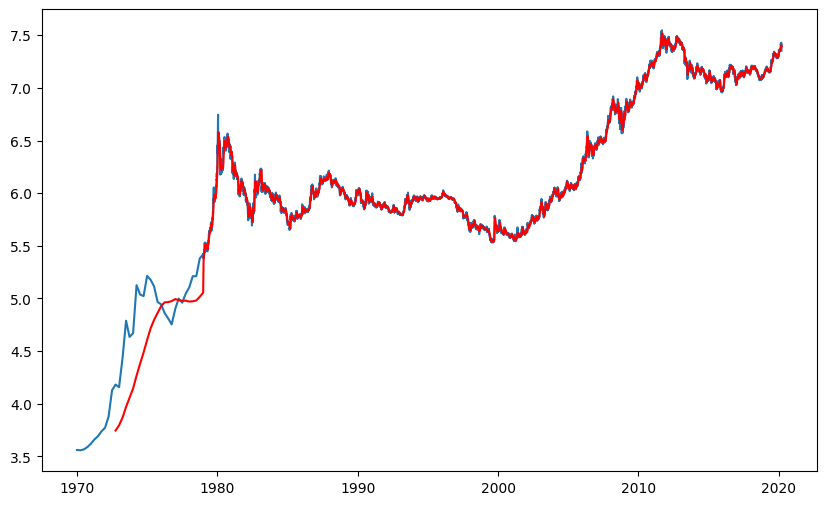

In [12]:
movingaverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingaverage, color='red')
#plt.plot(movingSTD, color='black')

In [13]:
dataLogScaleMinusMovingAverage = indexedDataset_logScale - movingaverage
dataLogScaleMinusMovingAverage.head(12)

,Value
Date,
1970-01-01,NaN
1970-04-01,NaN
1970-07-01,NaN
1970-10-01,NaN
1971-01-01,NaN
1971-04-01,NaN
1971-07-01,NaN
1971-10-01,NaN
1972-01-03,NaN


In [14]:
#Remove NaN values
dataLogScaleMinusMovingAverage.dropna(inplace=True)
dataLogScaleMinusMovingAverage.head(18)

,Value
Date,
1972-10-02,0.436407
1973-01-01,0.361987
1973-04-02,0.567121
1973-07-02,0.818077
1973-10-01,0.577342
1974-01-01,0.525272
1974-04-01,0.859481
1974-07-01,0.658555
1974-10-01,0.536442


#### 1(b) : Plotting

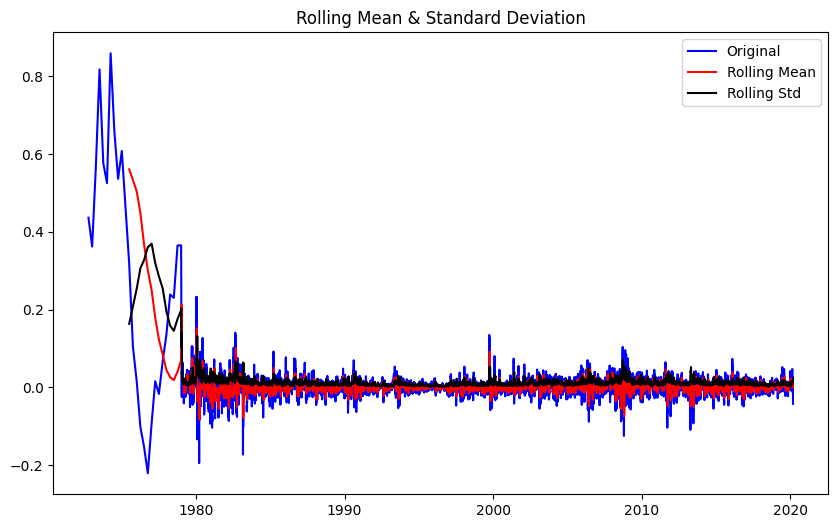

Results of Dickey Fuller Test
Test statistic                -18.928513
p-value                         0.000000
#Lags used                     21.000000
No. of observations used    10754.000000
Critical value (1%)            -3.430958
Critical value (5%)            -2.861809
Critical value (10%)           -2.566913
dtype: float64


In [15]:
test_stationarity(dataLogScaleMinusMovingAverage)

Note :
* Test statistics & Critical values are almost equal. This helps to understand whether your data is stationary or not.
* p-value is almost nearer to 0


### Transformation - 2 : Subtrating Exponential Decay Weighted Average from LogScale Data

#### 2(a) : Computation

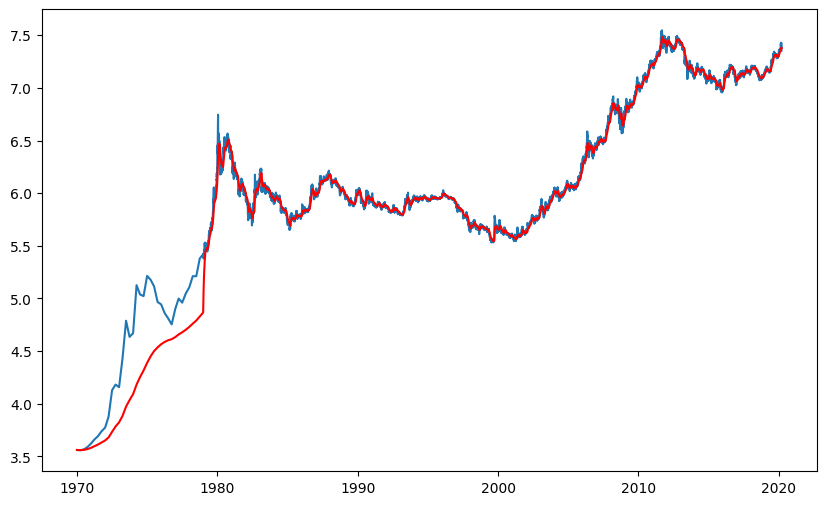

In [16]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

As the time series progresses, the average is also progessing to higher side

In [17]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage

#### 2(c) :  Plotting

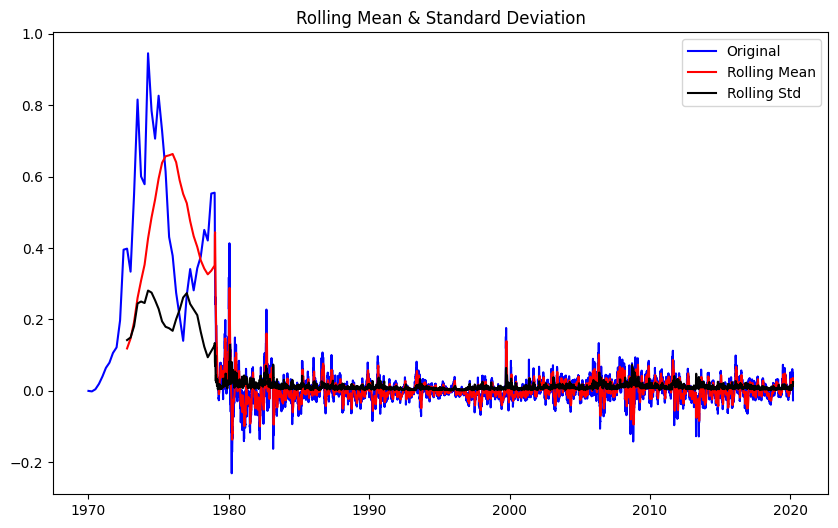

Results of Dickey Fuller Test
Test statistic             -1.729634e+01
p-value                     5.663977e-30
#Lags used                  2.100000e+01
No. of observations used    1.076500e+04
Critical value (1%)        -3.430958e+00
Critical value (5%)        -2.861809e+00
Critical value (10%)       -2.566913e+00
dtype: float64


In [18]:
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

* The std deviation is almost flat. That means there is no trend.
* Rolling mean better than previous results.
* p value is nearing 0 ==> time series stationary.

## Step - 5 : Understanding the **Components** of Time Series

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(indexedDataset_logScale, label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

* It shows a positive trend
* Depicts the seasonality component in the dataset
* Depicts the irregularity /  residuals present in the data

## Step - 6 : Check whether the noise is stationary or not

In [20]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
print(decomposedLogData)

NameError: name 'residual' is not defined

In [ ]:
decomposedLogData.describe()

count    132.000000
mean      -0.000866
std        0.033505
min       -0.108624
25%       -0.015421
50%       -0.000013
75%        0.015892
max        0.089858
Name: resid, dtype: float64

In [ ]:
decomposedLogData.head(12)

Month
1949-07-01   -0.050884
1949-08-01   -0.048415
1949-09-01    0.001223
1949-10-01    0.003156
1949-11-01    0.005749
1949-12-01    0.011045
1950-01-01   -0.039093
1950-02-01    0.069306
1950-03-01    0.037236
1950-04-01    0.014028
1950-05-01   -0.075473
1950-06-01   -0.035148
Name: resid, dtype: float64

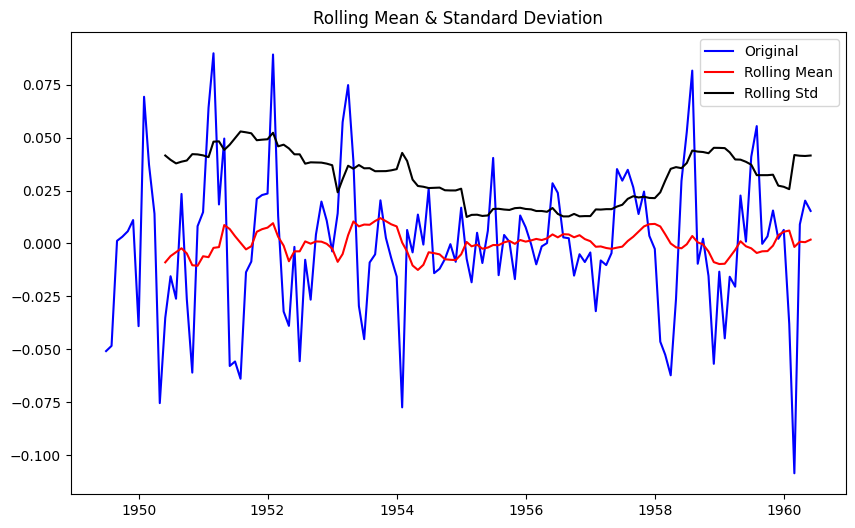

Results of Dickey Fuller Test


KeyError: '#Passengers'

In [ ]:
test_stationarity(decomposedLogData)

Observation : The residuals are not stationary.

## Step - 7 : Implement the AR Model

### 7(a) : Plot the ACF and PACF graphs
- for LogScale Data from whihc Exponential Decay Weighted Average is subtracted

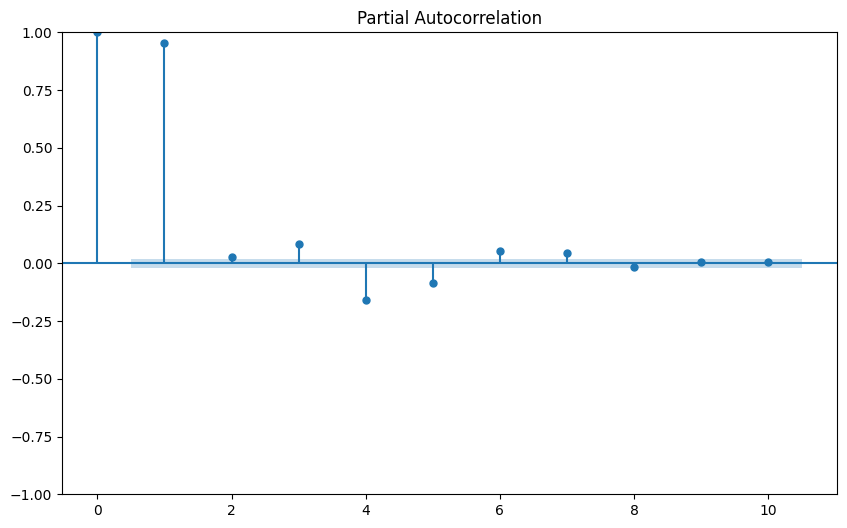

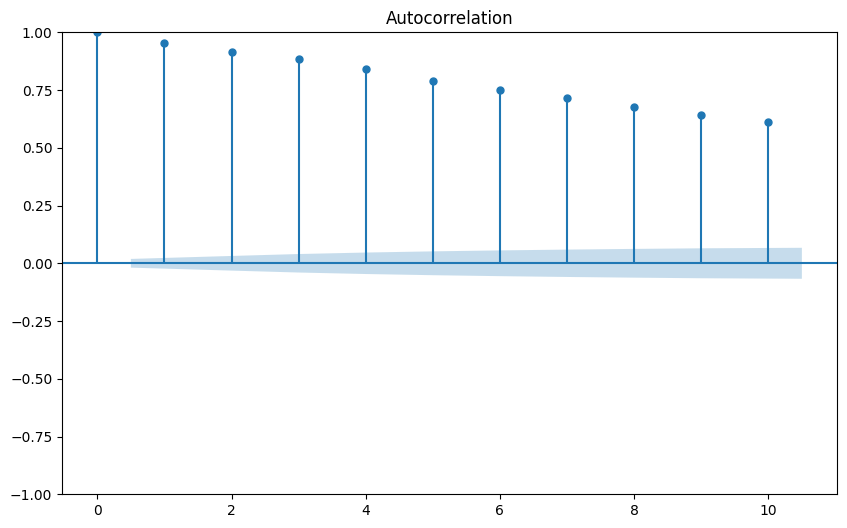

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf=plot_pacf(datasetLogScaleMinusMovingExponentialDecayAverage,lags=10)
acf=plot_acf(datasetLogScaleMinusMovingExponentialDecayAverage,lags=10)

### 7(b) : Split the LogScale Data for Training & Testing
- Training with 7 years data
- Testing with 5 years data

In [22]:
train=datasetLogScaleMinusMovingExponentialDecayAverage[:len(datasetLogScaleMinusMovingExponentialDecayAverage)-60]
test=datasetLogScaleMinusMovingExponentialDecayAverage[len(datasetLogScaleMinusMovingExponentialDecayAverage)-60:]

### 7(c) : Train the AR Model

In [23]:
from statsmodels.tsa.ar_model import AutoReg
# AR Model with p = 2 from PACF plot
model_1 = AutoReg(train, lags=1).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [24]:
print(model_1.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Value   No. Observations:                10727
Model:                     AutoReg(1)   Log Likelihood               31184.889
Method:               Conditional MLE   S.D. of innovations              0.013
Date:                Sun, 31 Mar 2024   AIC                         -62363.778
Time:                        16:39:38   BIC                         -62341.936
Sample:                             1   HQIC                        -62356.410
                                10727                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.741      0.082   -2.81e-05       0.000
Value.L1       0.9558      0.003    336.685      0.000       0.950       0.961
                                    Roots           

Observation : Lower the p value, more significant that time lag

In [ ]:
# Experimenting with lag = 10
# model_2 = AutoReg(train, lags=10).fit()
#print(model_2.summary())

### 7(d) : Test the AR Model

In [25]:
pred=model_1.predict(start=len(train),end=len(datasetLogScaleMinusMovingExponentialDecayAverage)-1, dynamic=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [26]:
print(len(train))

10727


In [27]:
print(pred)

10727    0.004157
10728    0.004196
10729    0.004235
10730    0.004271
10731    0.004306
10732    0.004339
10733    0.004371
10734    0.004401
10735    0.004430
10736    0.004458
10737    0.004485
10738    0.004510
10739    0.004534
10740    0.004558
10741    0.004580
10742    0.004601
10743    0.004621
10744    0.004640
10745    0.004659
10746    0.004677
10747    0.004694
10748    0.004710
10749    0.004725
10750    0.004740
10751    0.004754
10752    0.004767
10753    0.004780
10754    0.004793
10755    0.004804
10756    0.004816
10757    0.004826
10758    0.004837
10759    0.004847
10760    0.004856
10761    0.004865
10762    0.004873
10763    0.004882
10764    0.004889
10765    0.004897
10766    0.004904
10767    0.004911
10768    0.004918
10769    0.004924
10770    0.004930
10771    0.004935
10772    0.004941
10773    0.004946
10774    0.004951
10775    0.004956
10776    0.004960
10777    0.004965
10778    0.004969
10779    0.004973
10780    0.004977
10781    0.004980
10782    0

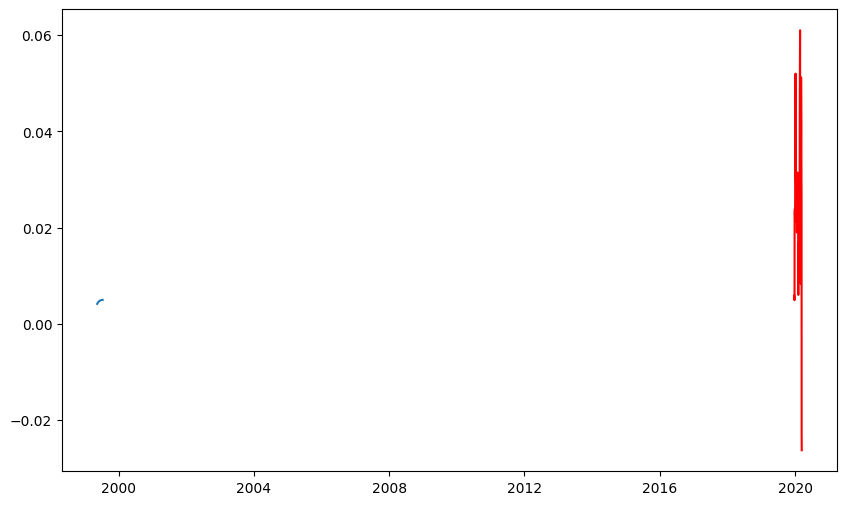

In [28]:
plt.plot(pred)
plt.plot(test, color='red')

### 7(e) : Calculate the Error

In [29]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test,pred))
print(rmse)

0.024679723470779527


### 7(f) : Making future predictions

In [30]:
pred_future=model_1.predict(start=len(datasetLogScaleMinusMovingExponentialDecayAverage)+1, end=len(datasetLogScaleMinusMovingExponentialDecayAverage)+60, dynamic=False)
print("Prediction for next 5 years")
print(pred_future)
print("No. of predictions : \t", len(pred_future))

Prediction for next 5 years
10788    0.005002
10789    0.005004
10790    0.005007
10791    0.005009
10792    0.005011
10793    0.005013
10794    0.005015
10795    0.005017
10796    0.005019
10797    0.005021
10798    0.005022
10799    0.005024
10800    0.005026
10801    0.005027
10802    0.005029
10803    0.005030
10804    0.005031
10805    0.005032
10806    0.005034
10807    0.005035
10808    0.005036
10809    0.005037
10810    0.005038
10811    0.005039
10812    0.005040
10813    0.005040
10814    0.005041
10815    0.005042
10816    0.005043
10817    0.005043
10818    0.005044
10819    0.005045
10820    0.005045
10821    0.005046
10822    0.005047
10823    0.005047
10824    0.005048
10825    0.005048
10826    0.005049
10827    0.005049
10828    0.005050
10829    0.005050
10830    0.005050
10831    0.005051
10832    0.005051
10833    0.005051
10834    0.005052
10835    0.005052
10836    0.005052
10837    0.005053
10838    0.005053
10839    0.005053
10840    0.005053
10841    0.005054


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


## Step - 8 : Implement ARIMA Model

### 8(a) : Deriving the parameters of ARIMA Models

Note :
* ARIMA model consists of 3 models
  - AR (Autoregression) model
  - Integration
  - MA (Movung Average) model
* ARIMA Model has 3 parameters
  - p : autoregressive lags
  - d : order of differnetiation (# times a time series is differentiated)
  - q : moving average

#### 8(a) - 1 : Compute d *value*
Differentiate the LogScale Data by 1 ie. d = 1

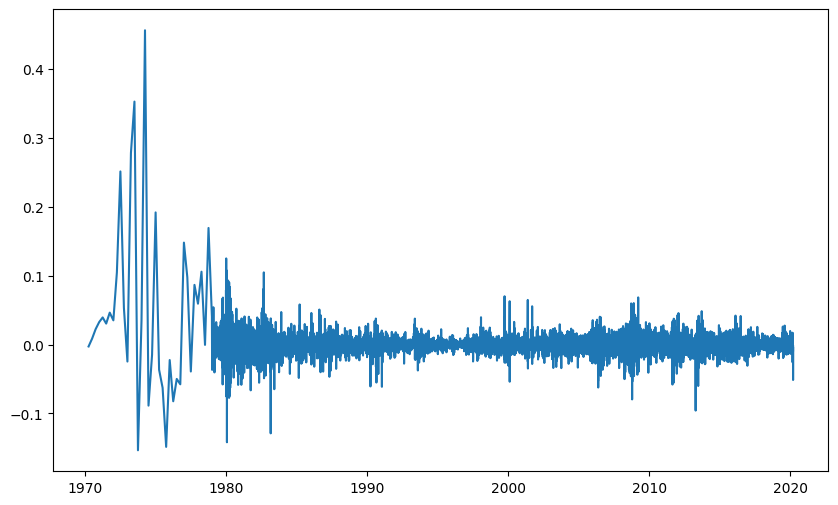

In [31]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

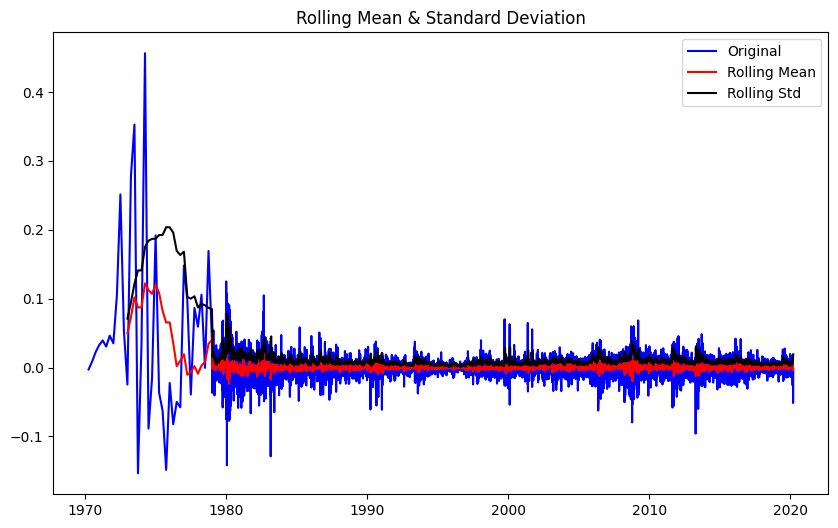

Results of Dickey Fuller Test
Test statistic                -28.616886
p-value                         0.000000
#Lags used                     20.000000
No. of observations used    10765.000000
Critical value (1%)            -3.430958
Critical value (5%)            -2.861809
Critical value (10%)           -2.566913
dtype: float64


In [32]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

* Rolling Mean, Output is quite flat.
* Null Hypothesis / ADF is rejected as the time series is stationary.
* There is no trend



* This clearly states that, the time series is not stationary. So, we require the moving average parameter in place.

* We know the value of d = 1

#### 8(a)-2 : Compute p & q values

* Autocorrelation Function (ACF) Graph : To find q value
* Partial Autocorrelation Function (PACF) Graph : To compute p value

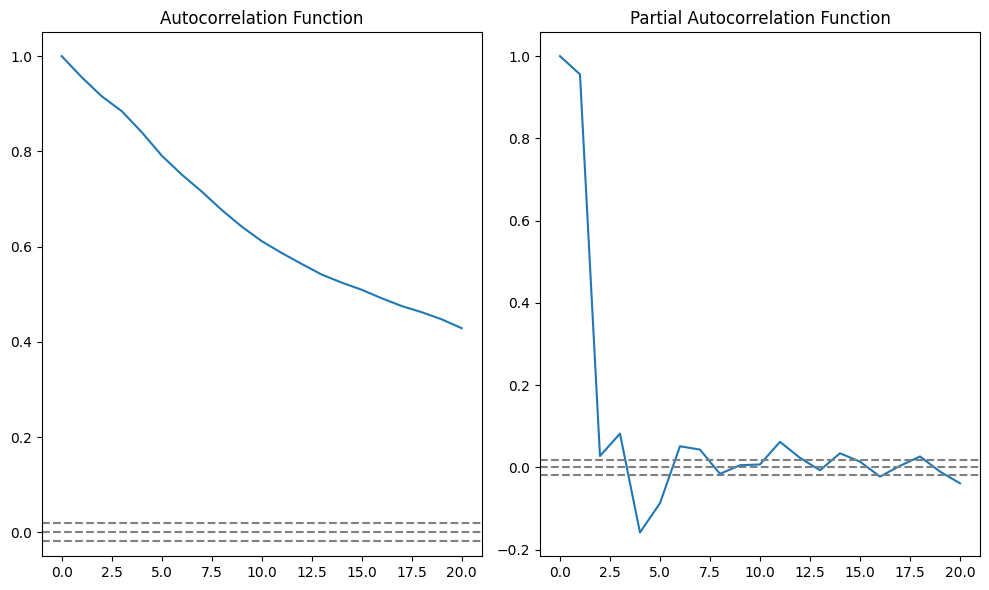

In [33]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(datasetLogScaleMinusMovingExponentialDecayAverage, nlags=20)
lag_pacf = pacf(datasetLogScaleMinusMovingExponentialDecayAverage,nlags=20, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.title("Autocorrelation Function")

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

Check where the value drops to 0 for the first time in each of these graphs.
* In PACF graph : p value = 2 (around)
* In ACF graph : q value = 2 (around)

As we know the values of p, q, and d, Lets substitute the values in the ARIMA Model.

### 8(b) : Compute the Models

#### 8(b) - 1 : AR Model using ARIMA package

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Date
1970-01-01    0.005155
1970-04-01    0.000228
1970-07-01   -0.001062
1970-10-01    0.004472
1971-01-01    0.018590
                ...   
2020-03-09    0.048931
2020-03-10    0.040743
2020-03-11    0.029440
2020-03-12    0.026503
2020-03-13   -0.020201
Length: 10787, dtype: float64
RSS: 1.878147
Plotting AR Model


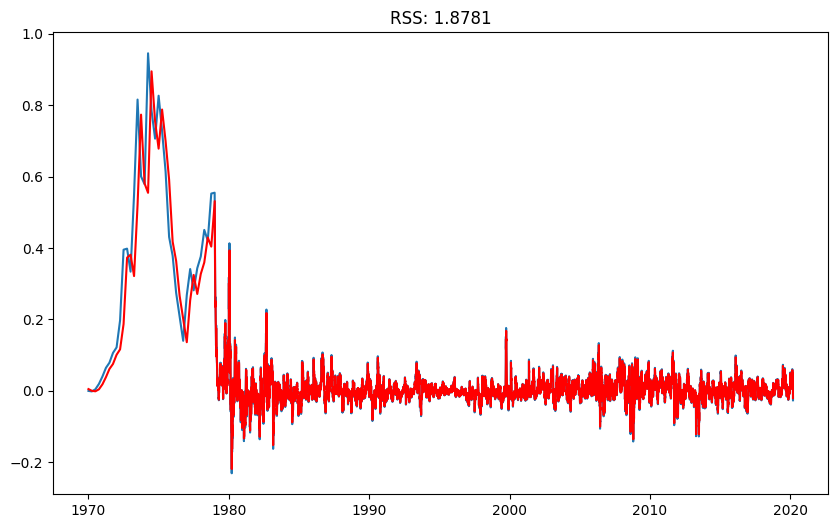

In [35]:
from statsmodels.tsa.arima.model import ARIMA
# AR Model
model_0 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,0,0))
results_AR = model_0.fit()
print(results_AR.fittedvalues)
print('RSS: %f' % sum((results_AR.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Value'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Value'])**2))
print("Plotting AR Model")

#### 8(b) - 2 : MA Model using ARIMA package

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Date
1970-01-01    0.005150
1970-04-01    0.001614
1970-07-01    0.000980
1970-10-01    0.007986
1971-01-01    0.020279
                ...   
2020-03-09    0.037039
2020-03-10    0.021264
2020-03-11    0.018615
2020-03-12    0.020782
2020-03-13   -0.040385
Length: 10787, dtype: float64
RSS: 4.655133
Plotting Ma Model


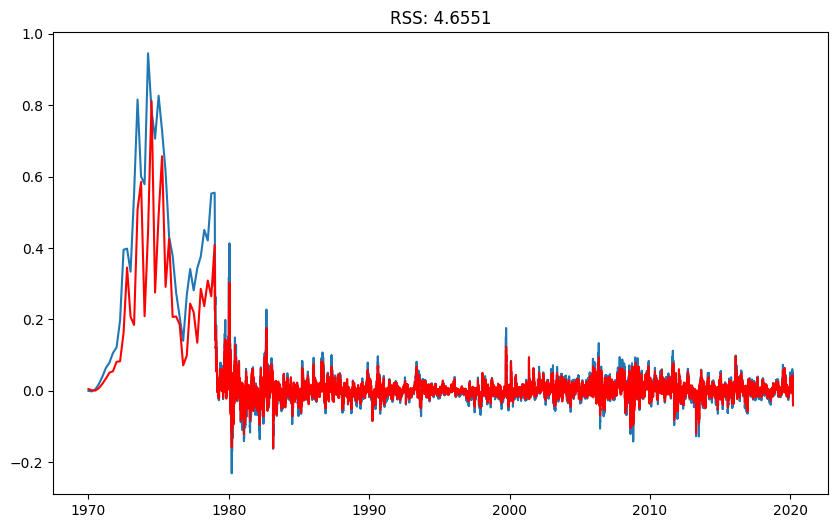

In [36]:
from statsmodels.tsa.arima.model import ARIMA
# MA Model
model_02 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(0,0,2))
results_MA = model_02.fit()
print(results_MA.fittedvalues)
print('RSS: %f' % sum((results_MA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Value'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_MA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Value'])**2))
print("Plotting Ma Model")

 #### 8(b) - 3 : ARMA Model using ARIMA package

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Date
1970-01-01    0.005049
1970-04-01    0.000145
1970-07-01   -0.001176
1970-10-01    0.004619
1971-01-01    0.018370
                ...   
2020-03-09    0.049159
2020-03-10    0.040238
2020-03-11    0.030743
2020-03-12    0.027718
2020-03-13   -0.020806
Length: 10787, dtype: float64
RSS: 1.866436
Plotting ARIMA Model


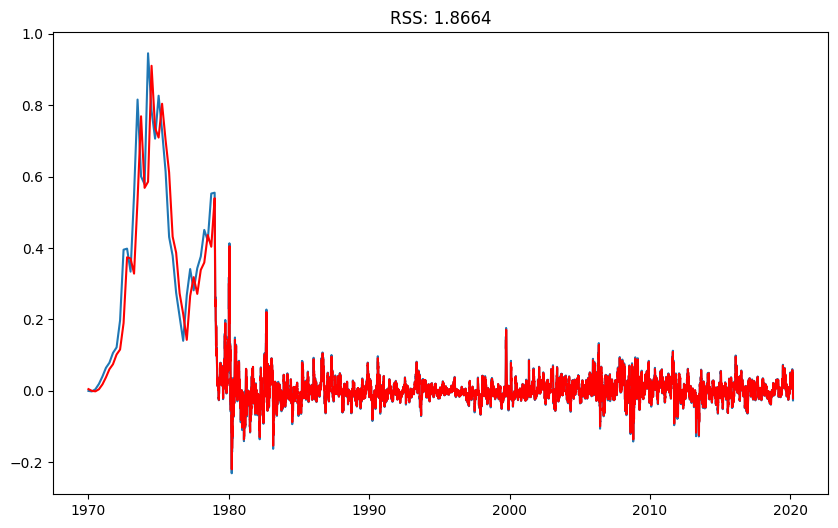

In [37]:
from statsmodels.tsa.arima.model import ARIMA
# ARMA Model
model_03 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,0,2))
results_ARMA = model_03.fit()
print(results_ARMA.fittedvalues)
print('RSS: %f' % sum((results_ARMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Value'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Value'])**2))
print("Plotting ARIMA Model")

 #### 8(b) - 4 : ARIMA Model using ARIMA package

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Date
1970-01-01    0.000000
1970-04-01    0.000000
1970-07-01   -0.001272
1970-10-01    0.004222
1971-01-01    0.017816
                ...   
2020-03-09    0.052969
2020-03-10    0.043208
2020-03-11    0.030297
2020-03-12    0.027448
2020-03-13   -0.018560
Length: 10787, dtype: float64
RSS: 1.853509
Plotting ARIMA Model


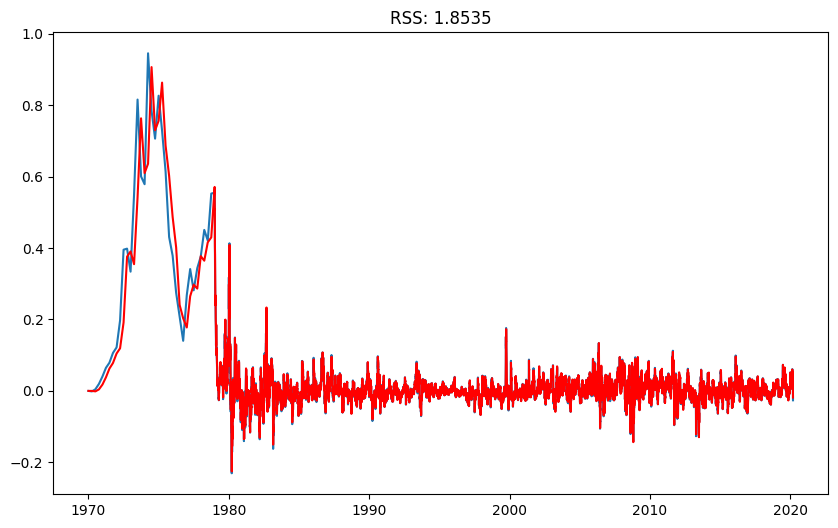

In [38]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model
model_1 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,1,2))
results_ARIMA = model_1.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Value'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Value'])**2))
print("Plotting ARIMA Model")

### 8(c) : Install the pmdarima package

In [39]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.6 MB/s eta 0:00:00


In [40]:
from pmdarima import auto_arima
#ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [41]:
stepwise_fit=auto_arima(indexedDataset_logScale, trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-61262.799, Time=62.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-61052.272, Time=4.56 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-61052.845, Time=4.56 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-61052.686, Time=4.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-61047.727, Time=1.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-61049.189, Time=27.94 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-61144.495, Time=46.84 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-61627.189, Time=8.45 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-61574.495, Time=34.91 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-61649.580, Time=13.92 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-61616.222, Time=5.55 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-61648.774, Time=26.27 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-61656.359, Time=17.39 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-61656.928, Time=18.75 s

KeyboardInterrupt: 

Note : SARIMAX - ARIMA with seasonality

#### Fit the ARIMA Model

Date
1970-01-01    0.000000
1970-04-01    0.000000
1970-07-01   -0.001316
1970-10-01    0.004417
1971-01-01    0.018410
                ...   
2020-03-09    0.052920
2020-03-10    0.044063
2020-03-11    0.033685
2020-03-12    0.027488
2020-03-13   -0.022523
Length: 10787, dtype: float64
RSS: 1.856867
Plotting ARIMA Model


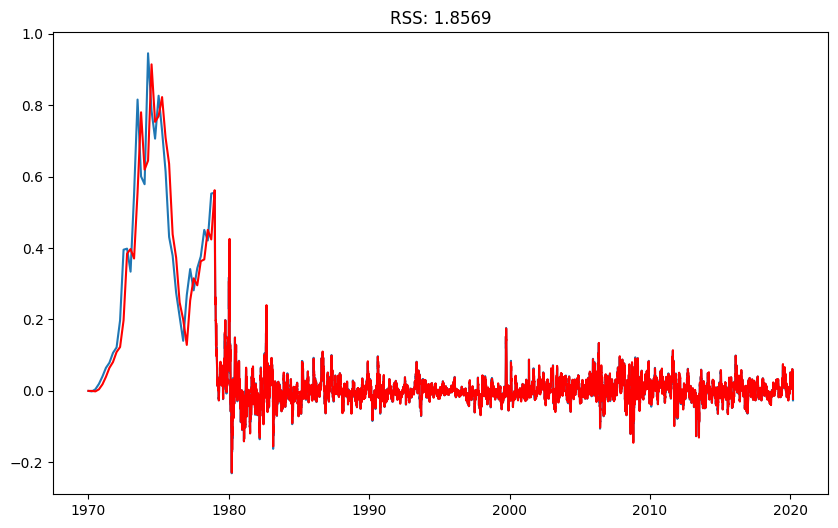

In [42]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model
model_2 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(4,1,3))
results_ARIMA = model_2.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Value'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Value'])**2))
print("Plotting ARIMA Model")

### 8(d) : Prepare the fitted values for predictions

Date
1970-04-01    0.000000
1970-07-01   -0.002845
1970-10-01    0.003122
1971-01-01    0.007480
1971-04-01    0.012267
                ...   
2020-03-09    0.003867
2020-03-10    0.002067
2020-03-11    0.004051
2020-03-12    0.001548
2020-03-13   -0.002140
Length: 10786, dtype: float64
RSS: 2.115524
Plotting ARIMA Model


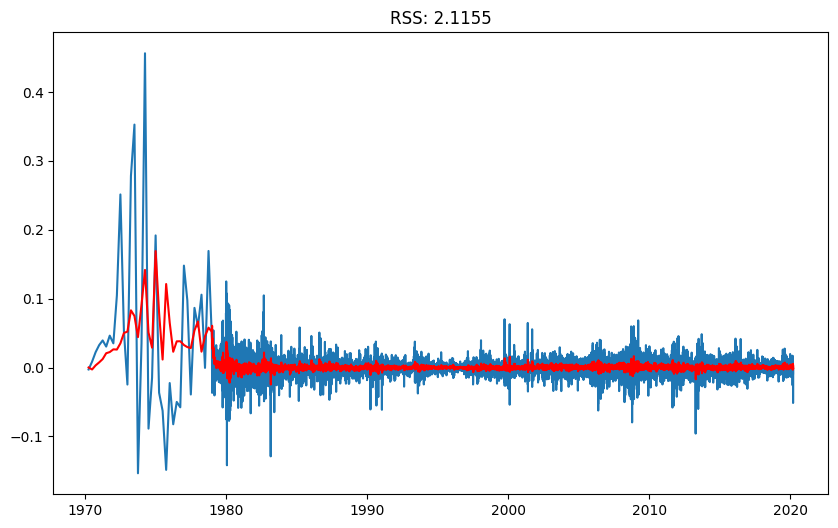

In [43]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model with
model_3 = ARIMA(datasetLogDiffShifting, order=(4,1,3))
results_ARIMA = model_3.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Value'])**2))
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Value'])**2))
print("Plotting ARIMA Model")

#### 8(d) - 1 : Convert the fitted values into a Series Format

In [44]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

Date
1970-04-01    0.000000
1970-07-01   -0.002845
1970-10-01    0.003122
1971-01-01    0.007480
1971-04-01    0.012267
dtype: float64


#### 8(d)- 2 : Find the Cummulative Sum and find the predictions for the fitted values

In [45]:
#Convert to Cummulative Sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
1970-04-01    0.000000
1970-07-01   -0.002845
1970-10-01    0.000277
1971-01-01    0.007757
1971-04-01    0.020024
dtype: float64


In [47]:
predictiona_ARIMA_log = pd.Series(indexedDataset_logScale['Value'].iloc[0],index = indexedDataset_logScale.index)
predictiona_ARIMA_log = predictiona_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictiona_ARIMA_log.head()

Date
1970-01-01    3.561046
1970-04-01    3.561046
1970-07-01    3.558201
1970-10-01    3.561323
1971-01-01    3.568803
dtype: float64

#### 8(d)-3 :  Perform Exponential of the data to bring it to original form

In [48]:
predictions_ARIMA = np.exp(predictiona_ARIMA_log)

#### 8(d)-4: Plot the predictions made by ARIMA Model over the original Data

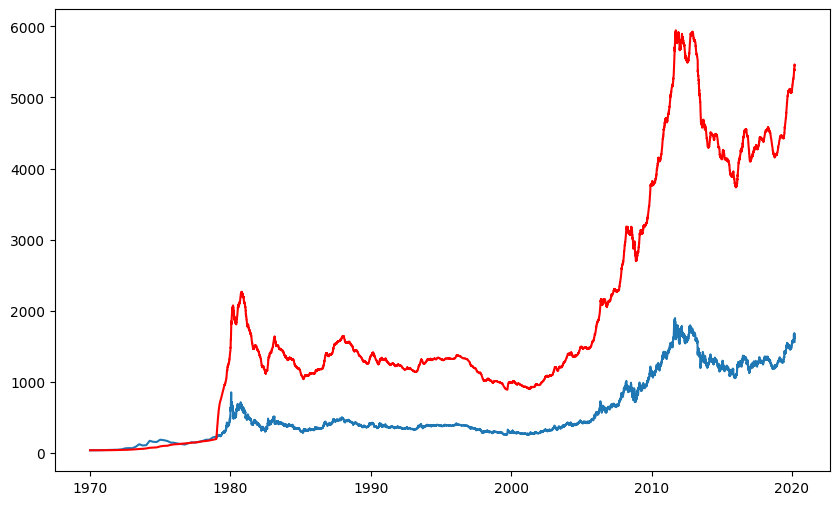

In [49]:
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA, color='red')

NOte:  Here the ARIMA model capture the shape of the Time Series. Only the magnitude varies.

### 8(e) : Predictions for 2 years

In [50]:
# Check the dimension of the dataset
indexedDataset_logScale

,Value
Date,
1970-01-01,3.561046
1970-04-01,3.558201
1970-07-01,3.566712
1970-10-01,3.589059
1971-01-01,3.621671
...,...
2020-03-09,7.422075
2020-03-10,7.411979
2020-03-11,7.410801


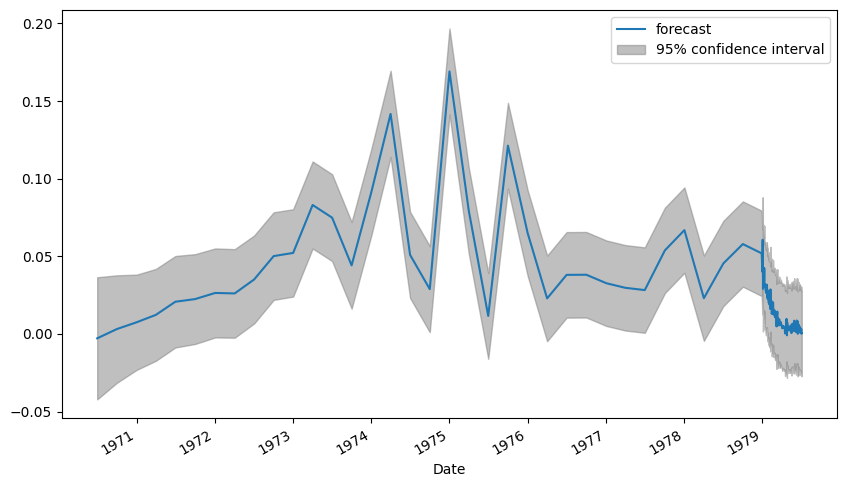

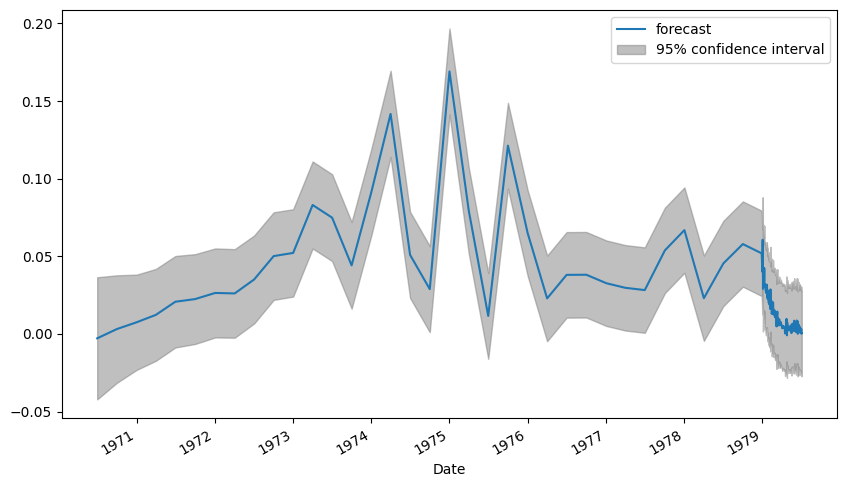

In [51]:
from statsmodels.graphics.tsaplots import plot_predict
# We have 144 rows + 24 to be predictions
plot_predict(results_ARIMA,1,168)

In [52]:
results_ARIMA.forecast(steps=24)

10786    0.002876
10787   -0.006352
10788   -0.004704
10789    0.004426
10790   -0.002042
10791   -0.002522
10792    0.001432
10793   -0.000398
10794   -0.001652
10795    0.000201
10796   -0.000173
10797   -0.001019
10798   -0.000306
10799   -0.000231
10800   -0.000691
10801   -0.000463
10802   -0.000330
10803   -0.000541
10804   -0.000494
10805   -0.000399
10806   -0.000482
10807   -0.000488
10808   -0.000436
10809   -0.000463
Name: predicted_mean, dtype: float64

### Approach  - 2

In [53]:
from statsmodels.tsa.arima.model import ARIMA
print(datasetLogScaleMinusMovingExponentialDecayAverage.shape)
train=datasetLogScaleMinusMovingExponentialDecayAverage.iloc[:-60]
test=datasetLogScaleMinusMovingExponentialDecayAverage.iloc[-60:]
print(train.shape,test.shape)

(10787, 1)
(10727, 1) (60, 1)
